In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df0 = pd.read_csv('sam_tianchi_mum_baby.csv')
df1 = pd.read_csv('sam_tianchi_mum_baby_trade_history.csv')

df0['birthday'] = pd.to_datetime(df0.birthday, format = '%Y%m%d')
df1['day'] = pd.to_datetime(df1.day, format = '%Y%m%d')


----
### 1. 分析用户特征

#### 1.1 婴幼儿生日时间分布

<AxesSubplot:title={'center':'Year of Birth'}, xlabel='birthyear', ylabel='user_id'>

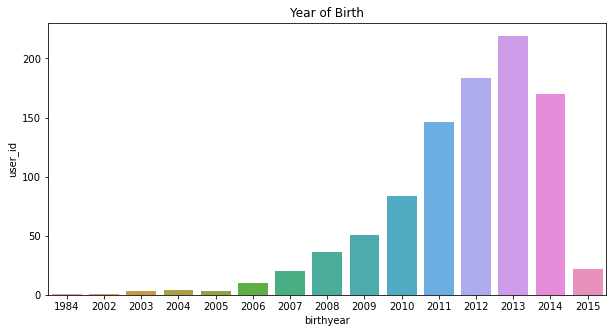

In [7]:
def get_year(x):
    return x.split('-')[0]
df0['birthyear'] = df0.birthday.astype('datetime64[Y]').astype('str').apply(get_year)
plt.figure(figsize=[10,5])
plt.title('Year of Birth')
temp = df0.groupby('birthyear')['user_id'].count()
sns.barplot(y = temp, x= temp.index)

<AxesSubplot:title={'center':'Month of Birth'}, xlabel='birthmonth', ylabel='user_id'>

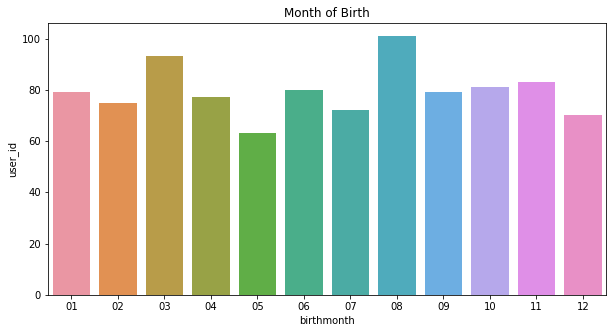

In [8]:
def get_month(x):
    return x.split('-')[1]
df0['birthmonth'] = df0.birthday.astype('str').apply(get_month)
plt.figure(figsize=[10,5])
plt.title('Month of Birth')
temp = df0.groupby('birthmonth')['user_id'].count()
sns.barplot(y = temp, x= temp.index)

<AxesSubplot:title={'center':'Day of Birth'}, xlabel='birthdate', ylabel='user_id'>

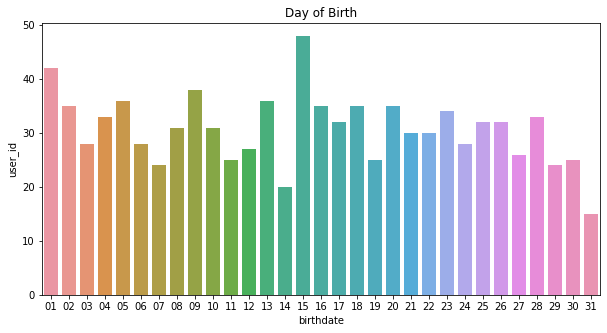

In [9]:
def get_day(x):
    return x.split('-')[2]
df0['birthdate'] = df0.birthday.astype('str').apply(get_day)
plt.figure(figsize=[10,5])
plt.title('Day of Birth')
temp = df0.groupby('birthdate')['user_id'].count()
sns.barplot(y = temp, x= temp.index)

可以看出，对于为孩子购买商品的父母，他们孩子的出生时间主要集中在2012~2014年，而出生的月份和日期比较平均。具体的孩子年龄分布见后续分析。

#### 1.2 婴幼儿性别分布

<AxesSubplot:title={'center':'Gender'}, xlabel='gender', ylabel='user_id'>

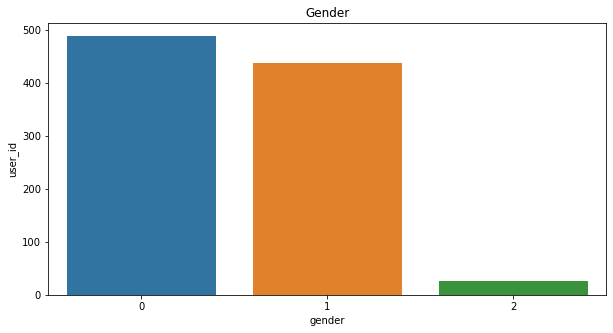

In [10]:
plt.figure(figsize=[10,5])
plt.title('Gender')
temp = df0.groupby('gender')['user_id'].count()
sns.barplot(y = temp, x= temp.index)

显然，顾客中性别记为0的婴幼儿明显多于性别标记为1的，这可能是总体婴幼儿性别分布的体现。

In [11]:
df0  = pd.merge(df0,df1,how='inner')

,user_id,birthday,gender,birthyear,birthmonth,birthdate,auction_id,cat_id,cat1,property,buy_mount,day
0,2757,2013-03-11,1,2013,03,11,17429550751,50010555,50008168,21458:30992;25935:31381;1628665:29796;1628665:...,1,2013-04-10
1,415971,2012-11-11,0,2012,11,11,20854308837,50010548,50008168,1628665:131622;25935:21991;22019:31001;22019:3...,1,2013-01-28
2,1372572,2012-01-30,1,2012,01,30,16915013171,50008845,28,21458:30992;1628665:3233941;1628665:3233942;16...,1,2013-03-27
3,10339332,2011-09-10,0,2011,09,10,13174075495,50001732,50014815,21458:3409452;3066697:92335415;2815901:9233541...,1,2014-05-26
4,10642245,2013-02-13,0,2013,02,13,14109039851,50006843,38,21458:7142737;8694098:95303334;12786373:54223;...,1,2013-06-17
...,...,...,...,...,...,...,...,...,...,...,...,...
951,2020957900,2014-04-30,0,2014,04,30,16310626305,121406041,50014815,21458:5954914;7979082:197263513,2,2014-08-29
952,2080304899,2010-07-13,0,2010,07,13,18692478396,50012442,50008168,21458:182661459;13023209:265962390;27599474:26...,1,2014-05-04
953,2114469016,2014-04-16,0,2014,04,16,38650644752,50023797,28,11666049:40203;21479:28619;21475:135183931,1,2014-08-09
954,2186831536,2014-05-19,1,2014,05,19,38380559230,50023531,28,1628665:3233941;1628665:3233942;1628665:323393...,1,2014-10-08


#### 1.2 婴幼儿年龄分布

In [12]:
def get_age(x):
    return int(x.split()[0])//30
df0['age'] = (df0['day']-df0['birthday']).astype('str')
df0['age'] = df0['age'].apply(get_age)

Text(0.5, 0, 'Months')

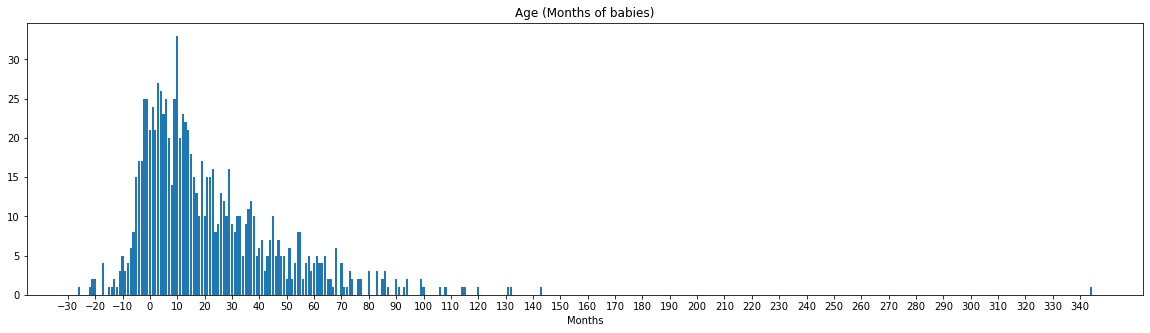

In [13]:

plt.figure(figsize=[20,5])
plt.title('Age (Months of babies)')
# plt.xlim([-77,df0.age.max()//30])
temp = df0.groupby('age')['user_id'].count()
plt.bar(height = temp, x= temp.index)
plt.xticks(range(-30,df0.age.max(),10))
plt.xlabel('Months')

可以从图中看出，购买商品的父母，他们购买商品时一般是在孩子出生前一年到出生后两年中。可以以此为标准估计顾客消费的可能性和重要性。

----
### 2. 分析订单特征

#### 2.1 时间分布特征

<AxesSubplot:title={'center':'Auctions Day'}, xlabel='date', ylabel='user_id'>

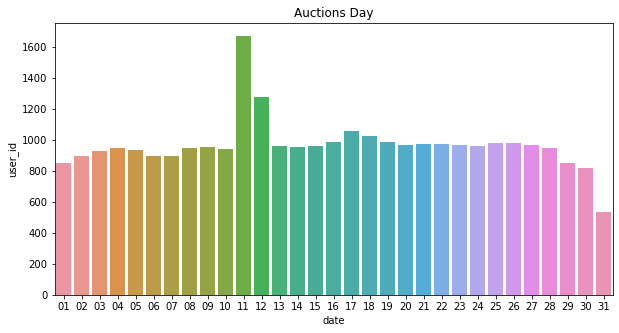

In [14]:
df1['date'] = df1.day.astype('str').apply(get_day)
plt.figure(figsize=[10,5])
plt.title('Auctions Day')
temp = df1.groupby('date')['user_id'].count()
sns.barplot(y = temp, x= temp.index)

<AxesSubplot:title={'center':'Auctions Month'}, xlabel='month', ylabel='user_id'>

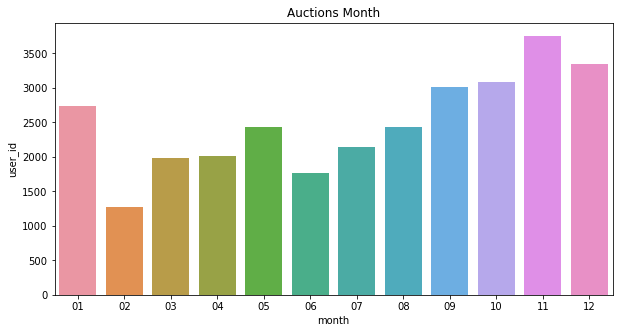

In [15]:
df1['month'] = df1.day.astype('str').apply(get_month)
plt.figure(figsize=[10,5])
plt.title('Auctions Month')
temp = df1.groupby('month')['user_id'].count()
sns.barplot(y = temp, x= temp.index)

<AxesSubplot:title={'center':'Auctions Year'}, xlabel='year', ylabel='user_id'>

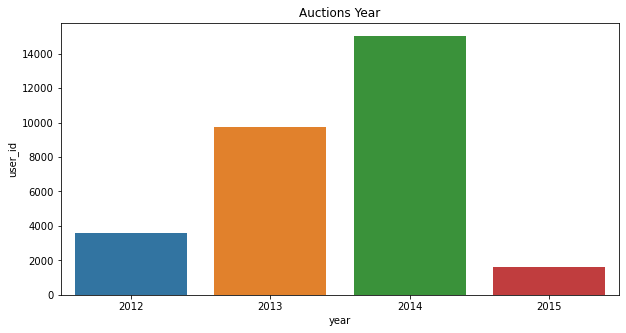

In [16]:
df1['year'] = df1.day.astype('str').apply(get_year)
plt.figure(figsize=[10,5])
plt.title('Auctions Year')
temp = df1.groupby('year')['user_id'].count()
sns.barplot(y = temp, x= temp.index)

根据上面三张图分析，由于数据只涵盖了2012和2015的部分月份，所以这两年交易量较少也是正常的。主要可以看出的是13和14年，这两两年的月份全覆盖了，可以看出后者相比前置交易量明显上涨了约40%，可以看出电商平台的发展增长。而在年内，明显秋冬季节交易量有上升的趋势，其中11月由于购物节存在是最高的。在月内则可以明显看出双十一的销量影响了统计，其他日期的交易量还是较为平均的。总体来说交易量在随年份增长而增长，而每年秋冬时节的交易量也大于春夏。双十一、双十二购物节的促销效果非常显著。

#### 2.2 客户重要性分析

In [17]:
temp = df1.groupby('user_id')['buy_mount'].sum()
print("根据销量确定的最重要20位客户")
print(temp.sort_values(ascending=False).head(20))


根据销量确定的最重要20位客户
user_id
2288344467    10000
117730165      2800
173701616      2748
1945590674     1500
32141414       1000
119395773       700
300857121       600
300205516       600
462029374       500
1671630112      498
105969610       450
125495768       410
119491758       400
50880819        399
871858982       350
1681976532      340
51409972        306
1925405730      300
10339114        300
65695459        276
Name: buy_mount, dtype: int64


In [18]:
temp = df1.groupby('user_id')['buy_mount'].count()
print("根据交易次数确定的最重要20位客户")
print(temp.sort_values(ascending=False).head(20))

根据交易次数确定的最重要20位客户
user_id
814316568     4
69889555      2
718313786     2
213455117     2
21833701      2
890739828     2
371804010     2
473068583     2
116466705     2
900655351     2
1954450396    2
14069200      2
613315428     2
775005980     2
1126907662    2
889177953     2
1137719147    2
50570082      2
57700536      2
73181079      2
Name: buy_mount, dtype: int64


#### 2.3 销量统计

<AxesSubplot:title={'center':'Sales by Day'}, xlabel='day', ylabel='buy_mount'>

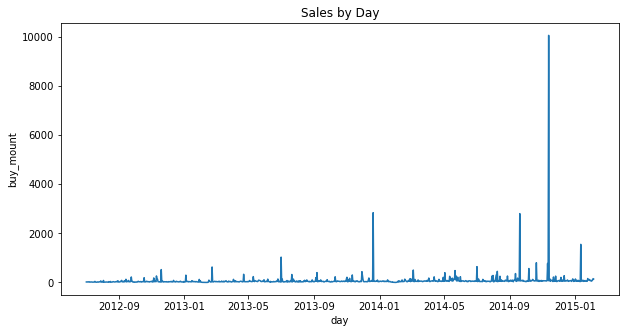

In [19]:
plt.figure(figsize=[10,5])
plt.title('Sales by Day')
temp = df1.groupby('day')['buy_mount'].agg('sum')
sns.lineplot(y = temp, x= temp.index)

<AxesSubplot:title={'center':'Sales by Month'}, xlabel='year-month', ylabel='buy_mount'>

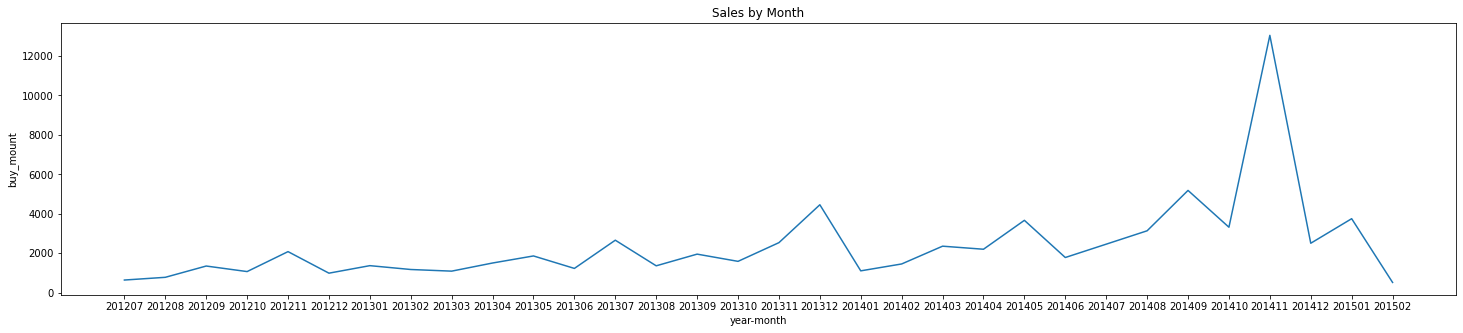

In [20]:
plt.figure(figsize=[25,5])
plt.title('Sales by Month')
df1['year-month'] = df1.year+df1.month
temp = df1.groupby('year-month')['buy_mount'].agg('sum')
sns.lineplot(y = temp, x= temp.index)

可以看出单日销量总体平稳，更明显的增长体现在双十一等购物节的增长上。

----
### 3. 交易和商品特征

#### 3.1 单次购买数量分布

(-0.5, 6.0)

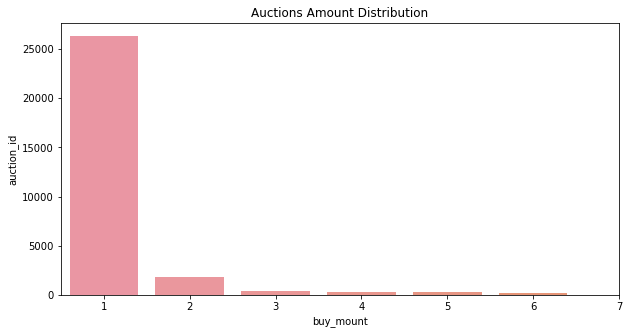

In [21]:
plt.figure(figsize=[10,5])
plt.title('Auctions Amount Distribution')

temp = df1.groupby('buy_mount')['auction_id'].count()
sns.barplot(y = temp, x= temp.index)
plt.xlim([-0.5,6])

可以看出主要是零售业务

<AxesSubplot:title={'center':'Repurchase'}, xlabel='auction_id', ylabel='user_id'>

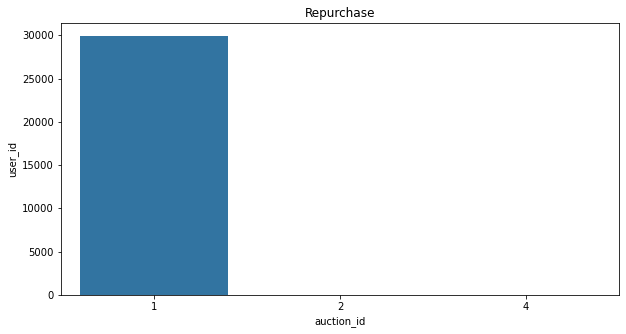

In [22]:
plt.figure(figsize=[10,5])
plt.title('Repurchase')
temp = df1.groupby('user_id')['auction_id'].count().reset_index().groupby('auction_id').count()
sns.barplot(y = temp.user_id, x= temp.index)


同时也几乎没人复购

#### 3.2 商品品类热度排名

In [23]:
print("交易品类（cat_id）排名")
temp = df1.groupby('cat_id')['auction_id'].count()
print(temp.sort_values(ascending=False).head(20))


交易品类（cat_id）排名
cat_id
50013636    2066
50010558    1341
50013207    1148
50006602     924
50011993     864
50012451     739
50018831     718
50012359     554
50010555     522
211122       502
50023591     476
50010566     464
50013711     431
50010549     420
50010557     413
50003700     407
50012365     390
50007011     361
50010544     331
50012442     321
Name: auction_id, dtype: int64


In [24]:
print("交易品类（cat1）排名")
temp = df1.groupby('cat1')['auction_id'].count()
print(temp.sort_values(ascending=False))

交易品类（cat1）排名
cat1
50008168     12494
28            6963
50014815      4834
50022520      2367
122650008     2110
38            1203
Name: auction_id, dtype: int64


In [26]:
def activity_plot(data=None,name=None):
    plt.style.use('ggplot')
    x = data.index
    y = data
    plt.figure(dpi=500,figsize=[15,5])
    plt.title(name)
    # plt.xlim(pd.Timestamp(2017,11,24),pd.Timestamp(2017,12,3))
    plt.plot(x,y)
    # plt.savefig(name+'.jpg')

#### 3.1 新用户变化

D:\programs\envs\python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  return f(*args, **kwargs)


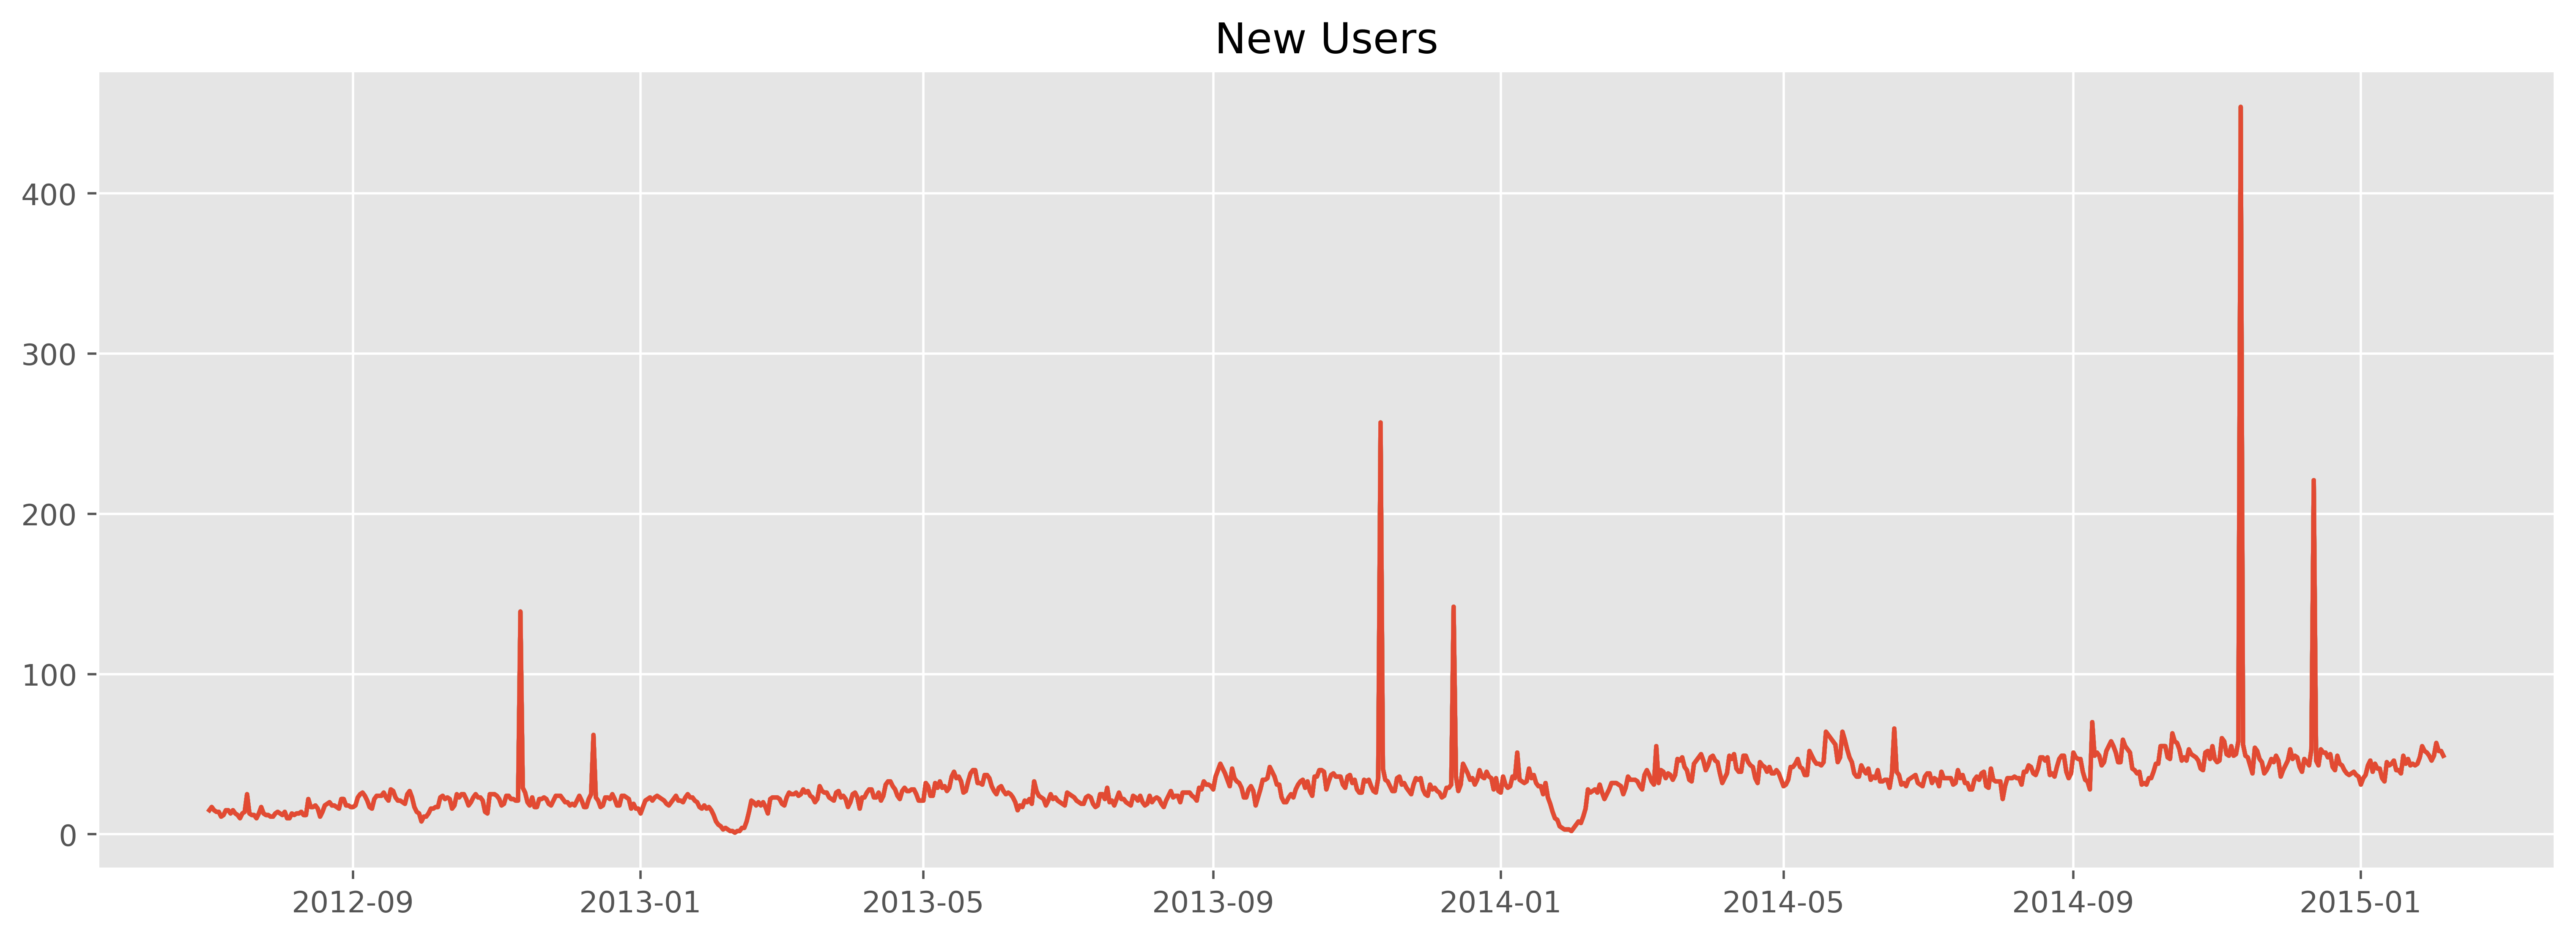

In [27]:
def new_user(df = df1):
    df = df.groupby('user_id').agg('min')
    df = df.groupby('day').agg('count')
    activity_plot(data=df,name='New Users')
new_user()

可以看出总体上新用户数量缓慢增长，而在购物节等促销活动中新用户出现爆发性增长。

根据上述分析，对于用户方面，发现用户特征比较明显，可以通过孩子的年龄等因素估计其购物的可能性。但另一方面，从交易中可以看出，用户的留存率低，复购率低，用户粘性不足。特别是在双十一这样的购物节出现暴发性的交易增长后，很快交易量又恢复到之前水平，说明用户没有被吸引住。因此针对这一现象，应该考虑采取更多补贴或更精准的推荐算法，以提高用户粘性。同时根据交易品类的分析，可以确定出最受欢迎的商品及其种类，因为对于各地的仓库可以有针对性地备货。最后，消费节等促销活动对于母婴用品销量的促进是非常显著的，应该特别重视，根据过去的增长趋势来看，未来促销的效果应该还有更大的上升空间，对母婴用品来说可以作为一个主要的销量增长点，同时也是吸引新用户注册的一个最主要的流量入口。

In [1]:
nums = [1,2,3,4,5,6]
k = 3
l = len(nums)
k = k % l
a = nums[-k:]
b = nums[:-k]
nums = a+b
nums

[4, 5, 6, 1, 2, 3]